In [1]:
IDS_TO_DISCARD = [
        "636767001a6d9265ec01787e",
        "636767461a6d9265ec017d17",
        "6367667f1a6d9265ec01745c",
        "636766821a6d9265ec0174d2",
        "6367667f1a6d9265ec017458",
        "636766811a6d9265ec017499",
        "6367667c1a6d9265ec0173f7",
        "6367667d1a6d9265ec0173ff",
        "6367667c1a6d9265ec0173fb",
        "636766811a6d9265ec017496",
        "636766801a6d9265ec017482",
        "636766801a6d9265ec017477",
        "636767781a6d9265ec01823d",
        "636767791a6d9265ec018257",
        "636767781a6d9265ec01823e",
        "636767de1a6d9265ec01871e",
        "636767de1a6d9265ec018706",
        "636767dc1a6d9265ec0186c6",
        "636767de1a6d9265ec018726",
        "636767e11a6d9265ec018790",
    
        "636766fe1a6d9265ec017833",
        "636767001a6d9265ec01787f",
        "636767071a6d9265ec017962",
        "636767641a6d9265ec01817d",
        "636767531a6d9265ec017efb",
        "6367675a1a6d9265ec018010",
        "636767601a6d9265ec0180fd",
        "636767641a6d9265ec018190",
        "636767841a6d9265ec0183ff",
    
        "636766f81a6d9265ec017748",
        "636766ef1a6d9265ec01761a",
        "636766fe1a6d9265ec017823",
        "636766f81a6d9265ec01774b",
        "636767611a6d9265ec018106",
        "636766821a6d9265ec0174b3",
        "636766851a6d9265ec017515",
        "636767691a6d9265ec0181ae",
        "636767791a6d9265ec018263",
        "636767781a6d9265ec018238",
        "636767781a6d9265ec018242",
        "6367677e1a6d9265ec018314",
        "636767841a6d9265ec0183f2",
        "636766a81a6d9265ec017596",
        "636766a81a6d9265ec01757b",
        "636767ab1a6d9265ec01867b",
        "636767aa1a6d9265ec01865a"
    ]

In [2]:
MODEL_NAMES = [
    'DeepSeek Coder 1.3B',
    'DeepSeek Coder 6.7B',
    'DeepSeek Coder 33B',
    'CodeLlama 7B',
    'CodeLlama 13B',
    'CodeLlama 34B',
    'GPT-3.5-turbo',
    'GPT-4-turbo'
]

MODEL_NAMES_SHORT = [
    'DSC 1.3B',
    'DSC 6.7B',
    'DSC 33B',
    'CL 7B',
    'CL 13B',
    'CL 34B',
    'GPT 3.5',
    'GPT 4'
]

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [ ]:
instances = json.load(open('../data/input/CoderEval4Java.json'))['RECORDS']

# Boolean

In [5]:
from sklearn import metrics

In [ ]:
# import data and add "level" field
boolean = pd.read_csv('../data/results/cg_judgement_java_boolean_human.csv')
level = []
for tid in boolean.target_id:
    l = [i['level'] for i in instances if i['_id'] == str(tid)][0]
    level.append(l)
boolean['level'] = level

In [ ]:
################# RUN THIS CELL ONLY IF YOU WANT TO CONSIDER ONLY CoderEval INSTANCES NOT HAVING EXTERNAL DEPENDENCIES #################
boolean = boolean.loc[(boolean.level == 'self_contained') | (boolean.level == 'slib_runnable')]

In [7]:
print(f'Shape before cleaning : {boolean.shape}.')
boolean.dropna(subset = 'generated_code', inplace = True) # exlude all the cases in which the model in charge of the code generation was not able to produce a valid prediction
boolean = boolean.loc[~boolean.target_id.isin(IDS_TO_DISCARD)] # exlude all the ids after the test suite cleaning
print(f'Shape after cleaning : {boolean.shape}.')
print()

for col in [c for c in boolean.columns if '_rating' in c]:
    boolean[col] = boolean[col].apply(lambda x : int(x) if x != '-' else x)
    print('{0} was not able to generate a valid judgement {1} times out of {2}'.format(col.split('_rating')[0], boolean.loc[boolean[col] == '-'].shape[0], boolean.shape[0]))

print()
for col in [c for c in boolean.columns if '_rating' in c]:
    bool_temp = boolean.loc[(boolean.generated_by == 'human_written') & (boolean[col] != '-')]
    judge = col.split('_rating')[0]
    print('{0} predicts "correct" for target {1} out of {2} ({3:.2f}%) (fails to give a valid judgement in {4} cases).'.format(judge, bool_temp[col].sum(), bool_temp.shape[0], bool_temp[col].sum()/bool_temp.shape[0]*100, 230-len(IDS_TO_DISCARD)-bool_temp.shape[0]))

Shape before cleaning : (2024, 21).
Shape after cleaning : (1615, 21).

deepseek-coder-1.3b-instruct was not able to generate a valid judgement 687 times out of 1615
deepseek-coder-6.7b-instruct was not able to generate a valid judgement 22 times out of 1615
deepseek-coder-33b-instruct was not able to generate a valid judgement 4 times out of 1615
CodeLlama-7b-Instruct-hf was not able to generate a valid judgement 1 times out of 1615
CodeLlama-13b-Instruct-hf was not able to generate a valid judgement 3 times out of 1615
CodeLlama-34b-Instruct-hf was not able to generate a valid judgement 2 times out of 1615
gpt-3.5-turbo was not able to generate a valid judgement 0 times out of 1615
gpt-4-turbo was not able to generate a valid judgement 27 times out of 1615

deepseek-coder-1.3b-instruct predicts "correct" for target 14 out of 104 (13.46%) (fails to give a valid judgement in 80 cases).
deepseek-coder-6.7b-instruct predicts "correct" for target 177 out of 178 (99.44%) (fails to give a v

/var/folders/4l/l9t6kyb179q8hhckb219jw200000gn/T/ipykernel_8944/259829377.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boolean_temp[f'{model}_rating'] = boolean_temp[f'{model}_rating'].apply(lambda x : int(x))
/var/folders/4l/l9t6kyb179q8hhckb219jw200000gn/T/ipykernel_8944/259829377.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boolean_temp[f'{model}_rating'] = boolean_temp[f'{model}_rating'].apply(lambda x : int(x))
/var/folders/4l/l9t6kyb179q8hhckb219jw200000gn/T/ipykernel_8944/259829377.py

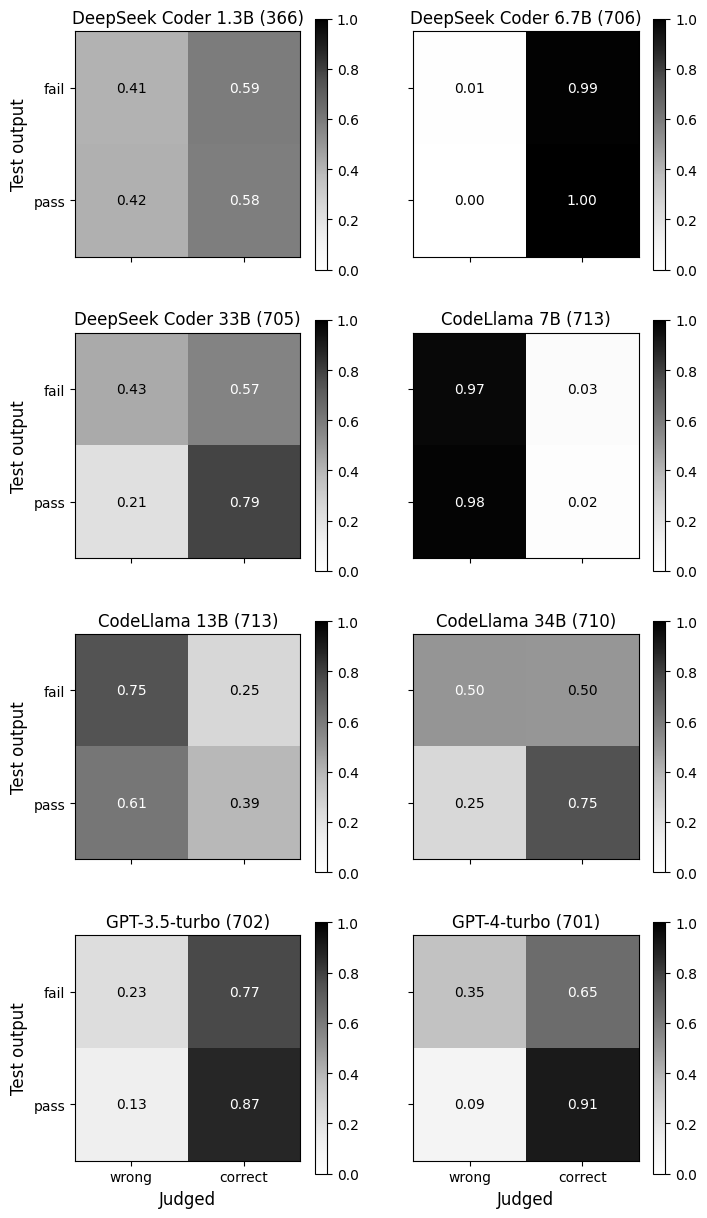

In [ ]:
num_rows, num_cols = 4, 2
fig, axs = plt.subplots(num_rows, num_cols, sharex = True, sharey = True, figsize = (8,15))
models = ['deepseek-coder-1.3b-instruct', 'deepseek-coder-6.7b-instruct', 'deepseek-coder-33b-instruct', 'CodeLlama-7b-Instruct-hf', 'CodeLlama-13b-Instruct-hf', 'CodeLlama-34b-Instruct-hf', 'gpt-3.5-turbo', 'gpt-4-turbo']
model_label = MODEL_NAMES

for i in range(num_rows):
    for j in range(num_cols):
        model = models[num_cols * i + j]
        boolean_temp = boolean.loc[boolean[f'{model}_rating'] != '-']
        boolean_temp[f'{model}_rating'] = boolean_temp[f'{model}_rating'].apply(lambda x : int(x))
        actual = boolean_temp.is_pass
        predicted = boolean_temp[f'{model}_rating']
        confusion_matrix = metrics.confusion_matrix(actual, predicted, normalize = 'true')
        cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
        cm_display.plot(cmap = 'Greys', ax = axs[i,j], values_format = '.2f')
        cm_display.im_.set_clim(0, 1)
        axs[i,j].set_title(f'{model_label[num_cols * i + j]} ({boolean_temp.shape[0]})')
        axs[i,j].set_xlabel('') if i != num_rows - 1 else axs[i,j].set_xlabel('Judged', fontsize = 12)
        axs[i,j].set_ylabel('') if j != 0 else axs[i,j].set_ylabel('Test output', fontsize = 12)

        axs[i,j].set_yticks(ticks = [0, 1], labels = ['fail', 'pass'])
        axs[i,j].set_xticks(ticks = [0, 1], labels = ['wrong', 'correct'])

plt.show()

# Kappa score
Evaluate the Kappa agreement score between the {0, 1} series of the is_pass field and the series of ratings given by the LLMs.

In [ ]:
from sklearn.metrics import cohen_kappa_score

In [12]:
# boolean kappa score
bool_kappa = []
for col in [c for c in boolean.columns if '_rating' in c]:
    boolean_kappa = boolean.loc[boolean[col] != '-']
    score = cohen_kappa_score(boolean_kappa['is_pass'], boolean_kappa[col].astype(int))
    bool_kappa.append('{0:.2f}'.format(score, boolean_kappa.shape[0]))
    print(col, ':', score, boolean_kappa.shape)

deepseek-coder-1.3b-instruct_rating : -0.008665829684294302 (366, 21)
deepseek-coder-6.7b-instruct_rating : 0.0118206482662091 (706, 21)
deepseek-coder-33b-instruct_rating : 0.23046841426729703 (705, 21)
CodeLlama-7b-Instruct-hf_rating : -0.010797679427977602 (713, 21)
CodeLlama-13b-Instruct-hf_rating : 0.12668042596386886 (713, 21)
CodeLlama-34b-Instruct-hf_rating : 0.2548019083177765 (710, 21)
gpt-3.5-turbo_rating : 0.11079101160589344 (702, 21)
gpt-4-turbo_rating : 0.27613398121616617 (701, 21)


In [ ]:
df = pd.DataFrame({
    'bool' : bool_kappa
}).T

df.columns = MODEL_NAMES
print(df.to_latex())

\begin{tabular}{lllllllll}
\toprule
 & DeepSeek Coder 1.3B & DeepSeek Coder 6.7B & DeepSeek Coder 33B & CodeLlama 7B & CodeLlama 13B & CodeLlama 34B & GPT-3.5-turbo & GPT-4-turbo \\
\midrule
bool & -0.01 & 0.01 & 0.23 & -0.01 & 0.13 & 0.25 & 0.11 & 0.28 \\
\bottomrule
\end{tabular}



# R analysis (boolean)

In [ ]:
# # write csv for R analysis
# # P-VALUE LLM 
# # - self judgement VS judgement of all other LLMs
# # - self judgement VS judgement of all other LLMs not belonging to the same family
# # - self judgement VS judgement of human witten functions

# for col in [c for c in boolean.columns if '_rating' in c]:
#     boolean_temp = boolean.loc[boolean[col] != '-'][['generated_by', col, 'is_pass']]
#     judge = col.split('_rating')[0]
#     family_name = col.split('-')[0]

#     temp = boolean_temp.loc[boolean_temp.generated_by == judge]
#     itsown = np.array(temp[col] - temp.is_pass) # judjements that the model in judge as given to the candidates proposed by judge itself
    
#     temp = boolean_temp.loc[(~boolean_temp.generated_by.str.contains(family_name)) & (boolean_temp.generated_by != 'human_written')]
#     all_but_family = np.array(temp[col] - temp.is_pass) # judjements that the model in judge as given to the candidates proposed by all the other LLMs not belonging to its family
    
#     temp = boolean_temp.loc[(boolean_temp.generated_by != judge) & (boolean_temp.generated_by != 'human_written')]
#     all_others = np.array(temp[col] - temp.is_pass) # judjements that the model in judge as given to the candidates proposed by all the other LLMs
    
#     temp = boolean_temp.loc[boolean_temp.generated_by == 'human_written']
#     human = np.array(temp[col] - temp.is_pass) # judjements that the model in judge as given to the target methods
#     while itsown.shape[0] < all_others.shape[0]:
#         itsown = np.concatenate((itsown, np.array([np.nan])))
#     while all_but_family.shape[0] < all_others.shape[0]:
#         all_but_family = np.concatenate((all_but_family, np.array([np.nan])))
#     while human.shape[0] < all_others.shape[0]:
#         human = np.concatenate((human, np.array([np.nan])))
    
#     pd.DataFrame({
#         'Model' : itsown,
#         'all_LLM' : all_others,
#         'all_Minus' : all_but_family,
#         'humans' : human
#     }).to_csv(f'../../2_llms_as_judge/results/cg_judgement/Ranalysis/{judge}_boolean-vs-others.csv', index = False)

# Self bias boolean

In [ ]:
# we consider both methods which pass and do not pass the tests. The metric is the difference between the judgments and the ground truth (is_pass)
models = ['deepseek-coder-1.3b-instruct', 'deepseek-coder-6.7b-instruct', 'deepseek-coder-33b-instruct', 'CodeLlama-7b-Instruct-hf', 'CodeLlama-13b-Instruct-hf', 'CodeLlama-34b-Instruct-hf', 'gpt-3.5-turbo', 'gpt-4-turbo', 'human_written']
rating_cols = [c for c in boolean.columns if '_rating' in c]
battle_ship = np.zeros((len(rating_cols), len(models)))

for row, judge in enumerate(rating_cols):
    for col, candidate in enumerate(models):
        bool_temp = boolean.loc[(boolean.generated_by == candidate) & (boolean[judge] != '-')]
        battle_ship[row, col] = (bool_temp[judge] - bool_temp.is_pass).sum() / bool_temp.shape[0]

d = {k : v for k, v in zip(models, battle_ship)}
df = pd.DataFrame(d).T
df.columns = models

df.columns = MODEL_NAMES_SHORT + ['Human Written']
df.index = MODEL_NAMES_SHORT
print(df.to_latex(index = True, float_format = "{:.2f}".format))

\begin{tabular}{lrrrrrrrrr}
\toprule
 & DSC 1.3B & DSC 6.7B & DSC 33B & CL 7B & CL 13B & CL 34B & GPT 3.5 & GPT 4 & Human Written \\
\midrule
DSC 1.3B & 0.63 & -0.08 & -0.23 & -0.10 & 0.53 & 0.53 & 0.52 & 0.56 & -0.87 \\
DSC 6.7B & 0.72 & 0.70 & 0.61 & 0.66 & 0.62 & 0.64 & 0.58 & 0.62 & -0.01 \\
DSC 33B & 0.25 & 0.27 & 0.23 & 0.21 & 0.22 & 0.19 & 0.27 & 0.30 & -0.68 \\
CL 7B & -0.24 & -0.30 & -0.37 & -0.31 & -0.36 & -0.32 & -0.28 & -0.37 & -1.00 \\
CL 13B & -0.07 & -0.16 & -0.23 & -0.18 & -0.20 & -0.22 & 0.18 & 0.04 & -0.81 \\
CL 34B & 0.23 & 0.25 & 0.15 & 0.19 & 0.17 & 0.16 & 0.34 & 0.36 & -0.47 \\
GPT 3.5 & 0.33 & 0.50 & 0.42 & 0.46 & 0.35 & 0.32 & 0.43 & 0.46 & -0.29 \\
GPT 4 & 0.33 & 0.41 & 0.40 & 0.34 & 0.34 & 0.29 & 0.41 & 0.52 & -0.37 \\
\bottomrule
\end{tabular}

